# Discovering Hidden Patterns: A Beginner's Guide to DBSCAN Clustering
Clustering is a powerful technique in data science used to group similar data points together based on their inherent patterns or density. One popular density-based clustering algorithm is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). In this post, we'll dive into how DBSCAN works and demonstrate how we can get things up and running in Python.

## What is DBSCAN?
DBSCAN is an unsupervised learning method that clusters data points based on the density of their neighbourhood. It groups together points that are closely packed, marking points that are in low-density regions as outliers.

The key parameters of DBSCAN are:

* `eps`: The maximum distance between two points for them to be considered as part of the same neighbourhood
* `min_samples`: The minimum number of points required to form a dense region

## How does DBSCAN work?
The DBSCAN algorithm follows these steps:

For each data point, the algorithm counts how many points are within a distance of `eps` (including the point itself).
If there are at least `min_samples` points within that distance, the current point is marked as a **core point**. All the points within its `eps` distance are added to the same cluster as the core point. The algorithm recursively repeats step 2 for each new point added to the cluster, expanding the cluster until no more points can be reached. Points that are not part of any cluster are marked as noise or outliers.

Here's a simple Python implementation using scikit-learn:

Number of clusters: 3


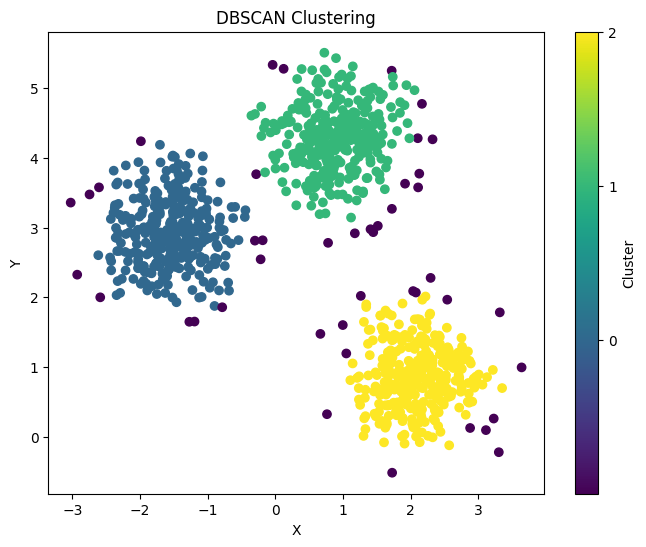

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=3, cluster_std=0.5, random_state=0)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X)

# Number of clusters found (ignoring noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters: {n_clusters}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.colorbar(ticks=range(n_clusters), label='Cluster')
plt.show()

In this example, we generate sample data using `make_blobs`, creating three distinct clusters. We then initialize DBSCAN with `eps=0.3` and `min_samples=10`, apply it to our data, and print out the number of clusters found. The purple dots represent outliers that were not associated with any of the three found clusters. The yellow, blue and green blobs represent the three blobs that were found. 

Let's run this again and increase the `eps` value to `0.5` to see the effect this has on the pattern of clustering.

Number of clusters: 3


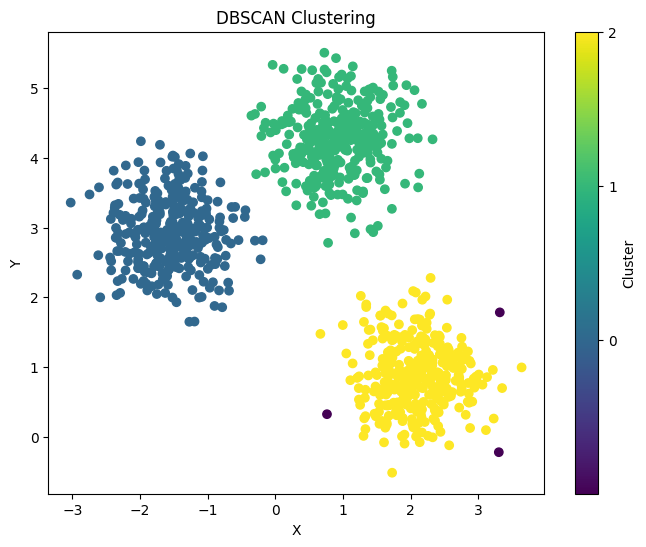

In [3]:
# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X)

# Number of clusters found (ignoring noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters: {n_clusters}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.colorbar(ticks=range(n_clusters), label='Cluster')
plt.show()

Because the `eps` value increased from `0.3` to `0.5` this means the maximum distance to be in a cluster increased, therefore the purple dots in the previous plot were just out of range of the prior value of `0.3` but are now 'welcomed into the cluster' with the more lenient `eps` value of `0.5`. If we lower the `eps` value, we should expect to see a lot more outliers (purple dots). Let's change `eps` to be `0.2` and verify whether this is the case.

Number of clusters: 3


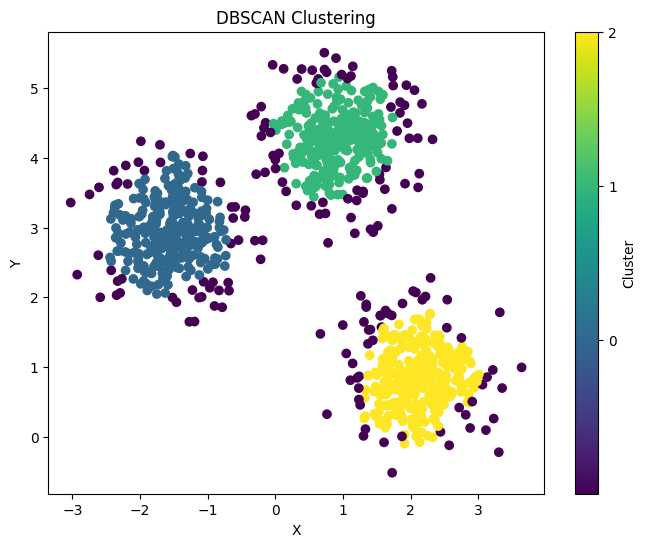

In [4]:
# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)
clusters = dbscan.fit_predict(X)

# Number of clusters found (ignoring noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters: {n_clusters}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.colorbar(ticks=range(n_clusters), label='Cluster')
plt.show()

This is what we predicted. By reducing `eps` we are enforcing stricter controls on whether borderline datapoints can be admitted into specific clusters.

## Advantages of DBSCAN
DBSCAN has several advantages over other clustering algorithms like k-means:

* It does not require specifying the number of clusters in advance
* It can identify clusters of arbitrary shape
* It is robust to outliers and noise in the data

In the next section, we'll explore a real-world application of DBSCAN and see how to tune its parameters for optimal results.